In [1]:
import requests

In [2]:
import bs4

In [3]:
base_url = 'http://stats.espncricinfo.com/ci/engine/player/'


In [4]:

player_id = '253802'


In [5]:
match_class = '2'

In [6]:
params = [
    ('class', match_class),
    ('template', 'results'),
    ('type', 'batting'),
    ('view', 'match')
]

In [7]:

url = base_url + player_id + '.html'

In [8]:

response = requests.get(url=url, params=params)
soup = bs4.BeautifulSoup(response.text,'lxml')


In [9]:
table = soup.find_all("table")[3]

In [10]:
rows = bs4.BeautifulSoup(str(table))

In [11]:

match_data = rows.find_all('tr')[1:]

In [13]:
data = []
i = 0
for match in match_data:
    i = i+1
    isDismissed = False
    didNotBat = False

    cols = bs4.BeautifulSoup(str(match))
    
    score_cell = cols.find_all('td')[0]
    soup = bs4.BeautifulSoup(str(score_cell))
    score = soup.get_text()
    if score == "DNB" or score == "TDNB":
        didNotBat = True
        runs = 0
    elif "*" in score:
        runs = int(score[:-1])
    else:
        isDismissed = True
        runs =  int(score)
        

    bf_cell = cols.find_all('td')[2]
    soup = bs4.BeautifulSoup(str(bf_cell))
    balls = soup.get_text()
    if balls == "-":
        ball = 0
        strikeRate = 0
    else:
        ball = balls
        if(int(balls)>0):
            strikeRate = round(int(runs)/int(balls) * 100,2)
        
    fours_cell  = cols.find_all('td')[4]
    soup = bs4.BeautifulSoup(str(fours_cell))
    fours = soup.get_text()
    if fours == "-":
        four = 0
    else:
        four = fours
    
    sixes_cell  = cols.find_all('td')[5]
    soup = bs4.BeautifulSoup(str(sixes_cell))
    sixes = soup.get_text()
    if sixes == "-":
        six = 0
    else:
        six = sixes
    
    
    opposition_cell  = cols.find_all('td')[7]
    soup = bs4.BeautifulSoup(str(opposition_cell))
    opposition = soup.get_text()[2:]
    
    ground_cell  = cols.find_all('td')[8]
    soup = bs4.BeautifulSoup(str(ground_cell))
    ground = soup.get_text()
    
    date_cell  = cols.find_all('td')[9]
    soup = bs4.BeautifulSoup(str(date_cell))
    date = soup.get_text()
    
    id_cell  = cols.find_all('td')[10]
    soup = bs4.BeautifulSoup(str(id_cell))
    matchID = soup.get_text().split("#",1)[1] 
    
    entry = {
        'balls': int(ball),
        'batPosition': None,
        'captained': False,
        'date': date,
        'didNotBat': didNotBat,
        'dismissalType': None,
        'dismissedAgainst': None,
        'dismissalBowlerHand': None,
        'matchID': int(matchID),
        'minutes': 0,
        'fours': int(four),
        'firstBat': False,
        'ground': ground,
        'match': int(i),
        'notOut': not isDismissed,
        'opposition': opposition,
        'runs': int(runs),
        'sixes': int(six),
        'strikeRate': int(strikeRate),
        'won': False
    }
    data.append(entry)

In [14]:
import pandas as pd


In [15]:
dataset = pd.DataFrame(data)

In [16]:
arams = [
    ('class', match_class),
    ('template', 'results'),
    ('type', 'batting'),
    ('view', 'match'),
    ('result','1')
]
response = requests.get(url=url, params=params)
soup = bs4.BeautifulSoup(response.text,'lxml')
table = soup.find_all("table")[3]
match_data = table.find_all('tr')[1:]

won = []
for match in match_data:
    id_cell  = match.find_all('td')[10]
    soup = bs4.BeautifulSoup(str(id_cell))
    matchID = soup.get_text().split("#",1)[1]
    won.append(int(matchID))

In [17]:
params = [
    ('captain','1'),
    ('class', match_class),
    ('filter','advanced'),
    ('template', 'results'),
    ('type', 'batting'),
    ('view', 'match'),
]
response = requests.get(url=url, params=params)
soup = bs4.BeautifulSoup(response.text,'lxml')
table = soup.find_all("table")[3]
match_data = table.find_all('tr')[1:]

captained = []
for match in match_data:
    id_cell  = match.find_all('td')[10]
    soup = bs4.BeautifulSoup(str(id_cell))
    matchID = soup.get_text().split("#",1)[1]
    captained.append(int(matchID))

In [18]:
params = [
    ('class', match_class),
    ('filter','advanced'),
    ('template', 'results'),
    ('type', 'batting'),
    ('view', 'innings'),
]
response = requests.get(url=url, params=params)
soup = bs4.BeautifulSoup(response.text,'lxml')
table = soup.find_all("table")[3]
match_data = table.find_all('tr')[1:]

batPosition = []
batFirst = []
dismissalType = []
minutes = []
for match in match_data:

    id_cell  = match.find_all('td')[13]
    soup = bs4.BeautifulSoup(str(id_cell))
    matchID = soup.get_text().split("#",1)[1]

    position_cell  = match.find_all('td')[6]
    soup = bs4.BeautifulSoup(str(position_cell))
    batPosition.append({
        "id": int(matchID),
        "pos": soup.get_text()
    })
    
    minutes_cell  = match.find_all('td')[1]
    soup = bs4.BeautifulSoup(str(minutes_cell))
    if soup.get_text() != '-':
        minutes.append({
            "id": int(matchID),
            "min": soup.get_text()
        })
    
    dismissal_cell  = match.find_all('td')[7]
    soup = bs4.BeautifulSoup(str(dismissal_cell))
    if soup.get_text() != '-' or soup.get_text() != 'not out':
        dismissalType.append({
            "id": int(matchID),
            "type": soup.get_text()
        })
    
    innings_cell  = match.find_all('td')[8]
    soup = bs4.BeautifulSoup(str(innings_cell))
    if soup.get_text() == '1':  
        batFirst.append(int(matchID))

In [19]:
dismissedAgainst = []

params = [
    ('class', match_class),
    ('bowling_pacespin','1'),
    ('filter','advanced'),
    ('template', 'results'),
    ('type', 'batting'),
    ('view', 'dismissal_list'),
]
response = requests.get(url=url, params=params)
soup = bs4.BeautifulSoup(response.text,'lxml')
table = soup.find_all("table")[3]
match_data = table.find_all('tr')[1:]

for match in match_data:

    id_cell  = match.find_all('td')[9]
    soup = bs4.BeautifulSoup(str(id_cell))
    matchID = soup.get_text().split("#",1)[1]
    dismissedAgainst.append({
        "type": "pace",
        "id": int(matchID)
    })

params = [
    ('class', match_class),
    ('bowling_pacespin','2'),
    ('filter','advanced'),
    ('template', 'results'),
    ('type', 'batting'),
    ('view', 'dismissal_list'),
]
response = requests.get(url=url, params=params)
soup = bs4.BeautifulSoup(response.text,'lxml')
table = soup.find_all("table")[3]
match_data = table.find_all('tr')[1:]

for match in match_data:

    id_cell  = match.find_all('td')[9]
    soup = bs4.BeautifulSoup(str(id_cell))
    matchID = soup.get_text().split("#",1)[1]
    dismissedAgainst.append({
        "type": "spin",
        "id": int(matchID)
    })

In [20]:
dismissalBowlerHand = []

params = [
    ('class', match_class),
    ('bowling_hand','1'),
    ('filter','advanced'),
    ('template', 'results'),
    ('type', 'batting'),
    ('view', 'dismissal_list'),
]
response = requests.get(url=url, params=params)
soup = bs4.BeautifulSoup(response.text,'lxml')
table = soup.find_all("table")[3]
match_data = table.find_all('tr')[1:]

for match in match_data:

    id_cell  = match.find_all('td')[9]
    soup = bs4.BeautifulSoup(str(id_cell))
    matchID = soup.get_text().split("#",1)[1]
    dismissalBowlerHand.append({
        "hand": "right",
        "id": int(matchID)
    })

params = [
    ('class', match_class),
    ('bowling_hand','2'),
    ('filter','advanced'),
    ('template', 'results'),
    ('type', 'batting'),
    ('view', 'dismissal_list'),
]
response = requests.get(url=url, params=params)
soup = bs4.BeautifulSoup(response.text,'lxml')
table = soup.find_all("table")[3]
match_data = table.find_all('tr')[1:]

for match in match_data:

    id_cell  = match.find_all('td')[9]
    soup = bs4.BeautifulSoup(str(id_cell))
    matchID = soup.get_text().split("#",1)[1]
    dismissalBowlerHand.append({
        "hand": "left",
        "id": int(matchID)
    })

In [21]:
for match in won:
    dataset.loc[dataset['matchID'] == match, 'won'] = True
for match in captained:
    dataset.loc[dataset['matchID'] == match, 'captained'] = True
for match in batFirst:
    dataset.loc[dataset['matchID'] == match, 'firstBat'] = True
for match in dismissalType:
    dataset.loc[dataset['matchID'] == match['id'], 'dismissalType'] = match['type']
for match in dismissedAgainst:
    dataset.loc[dataset['matchID'] == match['id'], 'dismissedAgainst'] = match['type']
for match in dismissalBowlerHand:
    dataset.loc[dataset['matchID'] == match['id'], 'dismissalBowlerHand'] = match['hand']
for match in minutes:
    dataset.loc[dataset['matchID'] == match['id'], 'minutes'] = match['min']
for match in batPosition:
    dataset.loc[dataset['matchID'] == match['id'], 'batPosition'] = match['pos']

In [22]:

print(dataset)

     balls batPosition  captained         date  didNotBat dismissalBowlerHand  \
0       22           2      False  18 Aug 2008      False               right   
1       67           2      False  20 Aug 2008      False                left   
2       38           1      False  24 Aug 2008      False                None   
3       66           1      False  27 Aug 2008      False                left   
4       46           1      False  29 Aug 2008      False               right   
5        2           7      False  14 Sep 2009      False                None   
6       24           4      False  26 Sep 2009      False               right   
7        0           -      False  28 Sep 2009       True                None   
8      104           4      False  30 Sep 2009      False                None   
9       41           4      False  25 Oct 2009      False                left   
10      16           3      False   2 Nov 2009      False                left   
11      19           7      

In [25]:
json = dataset.to_json(orient='records')
print(json)

[{"balls":22,"batPosition":"2","captained":false,"date":"18 Aug 2008","didNotBat":false,"dismissalBowlerHand":"right","dismissalType":"lbw","dismissedAgainst":"pace","firstBat":true,"fours":1,"ground":"Dambulla","match":1,"matchID":2742,"minutes":"33","notOut":false,"opposition":"Sri Lanka","runs":12,"sixes":0,"strikeRate":54,"won":true},{"balls":67,"batPosition":"2","captained":false,"date":"20 Aug 2008","didNotBat":false,"dismissalBowlerHand":"left","dismissalType":"caught","dismissedAgainst":"pace","firstBat":false,"fours":6,"ground":"Dambulla","match":2,"matchID":2745,"minutes":"82","notOut":false,"opposition":"Sri Lanka","runs":37,"sixes":0,"strikeRate":55,"won":true},{"balls":38,"batPosition":"1","captained":false,"date":"24 Aug 2008","didNotBat":false,"dismissalBowlerHand":null,"dismissalType":"run out","dismissedAgainst":null,"firstBat":true,"fours":4,"ground":"Colombo (RPS)","match":3,"matchID":2750,"minutes":"40","notOut":false,"opposition":"Sri Lanka","runs":25,"sixes":0,"st

In [24]:
    
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
url ="C:\Users\s534624\Desktop\Pro\vk.json"
data = requests.get(url).json()
print(data)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-40-931596c89fa6>, line 1)

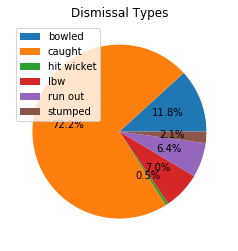

In [39]:
a = dataset.loc[~dataset['dismissalType'].isin({'not out','-'})]
b = a.groupby(by='dismissalType', as_index=False).size()
b.plot(kind='pie', title='Dismissal Types', autopct='%1.1f%%', legend=True, label='', labels=None)

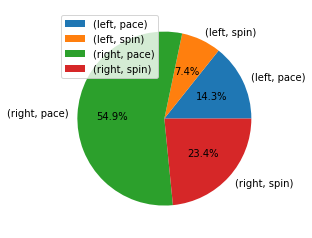

In [32]:
a = dataset.groupby(by=['dismissalBowlerHand','dismissedAgainst']).size()
a.plot(kind='pie', legend=True, autopct='%1.1f%%', label='')

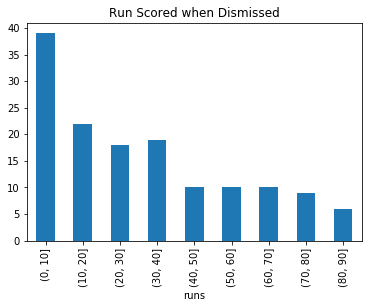

In [33]:
dismissed_matches = dataset.loc[~dataset['dismissalType'].isin({'not out','-'})]
grouped_data = dismissed_matches.groupby(pd.cut(dismissed_matches["runs"], np.arange(0, 100, 10))).size()
grouped_data.plot(kind='bar', title='Run Scored when Dismissed')